In [31]:
import pandas as pd
df=pd.read_csv("short.csv")

In [2]:
df.columns

Index(['id', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode',
       'QUXVlc3Rpb246MTA3 - En qui faites-vous le plus confiance pour vous faire représenter dans la société et pourquoi ?',
       'QUXVlc3Rpb246MTA4 - En dehors des élus politiques, faut-il donner un rôle plus important aux associations et aux organisations syndicales et professionnelles ?',
       'QUXVlc3Rpb246MTA5 - Si oui, à quel type d'associations ou d'organisations ? Et avec quel rôle ?',
       'QUXVlc3Rpb246MTEw - Que faudrait-il faire pour renouer le lien entre les citoyens et les élus qui les représentent ?',
       'QUXVlc3Rpb246MTEx - Le non-cumul des mandats instauré en 2017 pour les parlementaires (députés et sénateurs) est :',
       'QUXVlc3Rpb246MTEy - Pourquoi ?',
       'QUXVlc3Rpb246MTEz - Que faudrait-il faire pour mieux représenter les différentes sensibilités politiques ?',
       'QUXVlc3Rpb246MTE0 - Pensez-

In [33]:
df.columns=['id', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode','Q1',
            'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19',
             'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31','Q32','Q33',
            'Q34','Q35','Q36','Q37']

In [37]:
t=df['Q1']
t.head()

0                                           Le citoyen
1    Un instrument de démocratie locale à modernise...
2                                                  NaN
3    Voir l'intégralité de la proposition dans la d...
4                              député, maire, moi même
Name: Q1, dtype: object

In [6]:
import nltk
from nltk.tokenize import word_tokenize


In [7]:
from nltk.tokenize import word_tokenize
word=word_tokenize(t[1],"french")
print("The word here",len(word))
word

The word here 1459


['Un',
 'instrument',
 'de',
 'démocratie',
 'locale',
 'à',
 'moderniser',
 ':',
 'l',
 '’',
 'enquête',
 'publique',
 '.',
 'Un',
 'certain',
 'nombre',
 'de',
 'grands',
 'projets',
 'd',
 '’',
 'aménagement',
 'du',
 'territoire',
 'se',
 'sont',
 'heurtés',
 'ces',
 'dernières',
 'années',
 'à',
 'une',
 'hostilité',
 'locale',
 'parfois',
 'très',
 'violente',
 'pouvant',
 'même',
 'aller',
 'jusqu',
 '’',
 'au',
 'drame',
 ':',
 'Notre-Dame',
 'des',
 'Landes',
 ',',
 'le',
 'barrage',
 'de',
 'Sylens',
 ',',
 'le',
 'projet',
 'de',
 'Roybon',
 ',',
 'la',
 'déviation',
 'de',
 'Strasbourg',
 'et',
 'autres',
 '«',
 'Zones',
 'à',
 'Défendre',
 '»',
 'moins',
 'médiatiques',
 '.',
 'Pourtant',
 ',',
 'un',
 'instrument',
 'existe',
 ':',
 'l',
 '’',
 'enquête',
 'publique',
 '.',
 'Mais',
 'force',
 'est',
 'de',
 'constater',
 'qu',
 '’',
 'elle',
 'ne',
 'joue',
 'plus',
 'son',
 'rôle',
 'd',
 '’',
 'intermédiaire',
 'entre',
 'un',
 'apporteur',
 'de',
 'projet',
 'et',
 'l

### Stemmer

In [7]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french") 
stemmer.stem("etre")

'etre'

In [8]:
from nltk.stem import WordNetLemmatizer 
wnl = WordNetLemmatizer() 
print(wnl.lemmatize('etez',pos='v')) 

etez


### Stop Words removal

In [8]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('french')) 
stop= ["Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no", "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]
stop

['Ap.',
 'Apr.',
 'GHz',
 'MHz',
 'USD',
 'a',
 'afin',
 'ah',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'alors',
 'après',
 'as',
 'attendu',
 'au',
 'au-delà',
 'au-devant',
 'aucun',
 'aucune',
 'audit',
 'auprès',
 'auquel',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'autour',
 'autre',
 'autres',
 'autrui',
 'aux',
 'auxdites',
 'auxdits',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'b',
 'bah',
 'banco',
 'ben',
 'bien',
 'bé',
 'c',
 "c'",
 "c'est",
 "c'était",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-là',
 'celà',
 'cent',
 'cents',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'cf.',
 'cg',
 'cgr',
 'chacun',
 'c

In [9]:
word_stop=[w for w in word if w not in stopwords.words('french') ]
print("After removing stop words",len(word_stop))

After removing stop words 1033


In [14]:
import re
r =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"
cleanr = re.compile('<.*?>')
sentence = re.sub(cleanr, ' ', t[0])       
sentence = re.sub(r,'',sentence)


word=word_tokenize(sentence,"french")
print(len(word))
word_stop=[w for w in word if w not in stopwords.words('french') ]
print(len(word_stop))

2
2


In [12]:
from collections import Counter
dic=Counter(word_stop)
dic=sorted(dic.items(),key=lambda item:item[1],reverse=True)
len(dic)

465

In [13]:
stop.add('les')
stop.add('plus')

In [14]:
len(stop)


157

### Version 2.0

In [35]:
#t=pd.concat([df['Q1'],df['Q3']],axis=0)
t=df['Q1']
print("The Sample number before delete None",t.shape[0])
t=t.dropna(axis=0)  
print("The Sample number now:",t.shape[0])

The Sample number before delete None 712
The Sample number now: 154


### Tokenization

In [11]:
import time
begin=time.time()
from nltk.tokenize import word_tokenize
word=[]
for w in t:
    word.append(word_tokenize(w,"french") )
print("The words number after Tokenization",len(word))
print("Time cost: ",time.time()-begin)

The words number after Tokenization 154
Time cost:  0.10799908638000488


In [19]:
len(word[2])

11

### filter for special sympol

In [15]:
from nltk.tokenize import word_tokenize
begin=time.time()
import re
cleanr = re.compile('<.*?>')
r =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.•!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】«»]"
word=[]
for w in t:
    sentence = re.sub(cleanr, ' ', w)       
    sentence = re.sub(r,'',sentence)
    word=word+word_tokenize(sentence,"french")
print("The words number after filter",len(word))
print("Time cost: ",time.time()-begin)

The words number after filter 5176
Time cost:  0.08398723602294922


### Stemming

In [16]:
import time
begin=time.time()
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french") 
word_2=[stemmer.stem(w) for w in word]
print("The words number after Tokenization",len(word_2))
print("Time cost: ",time.time()-begin)

The words number after Tokenization 5176
Time cost:  0.18409085273742676


### Stop Words removal

In [17]:
begin=time.time()
from nltk.corpus import stopwords 
#stop = set(stopwords.words('french')) 
#stop=stop|set(['plus','dan','être','tout'])
stop= ["Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no", "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]
word_stop=[w for w in word_2 if w not in stop ]
print("After removing stop words",len(word_stop))
print("Time cost: ",time.time()-begin)

After removing stop words 2894
Time cost:  0.06000351905822754


### Store in the dictionary

In [21]:
from collections import Counter
from nltk.probability import FreqDist

#dic=Counter(word_stop)
#dic=sorted(dic.items(),key=lambda item:item[1],reverse=True)
text1=[w for w in word_stop if w.isalpha()]
fdist=FreqDist(text1)
fdist.most_common(50)


[('mair', 47),
 ('déput', 38),
 ('citoyen', 36),
 ('représent', 34),
 ('dan', 32),
 ('élus', 27),
 ('person', 27),
 ('publiqu', 26),
 ('projet', 26),
 ('dun', 26),
 ('local', 23),
 ('lenquêt', 19),
 ('pouvoir', 19),
 ('mêm', 18),
 ('confianc', 18),
 ('démocrat', 16),
 ('public', 16),
 ('cest', 16),
 ('doit', 15),
 ('polit', 15),
 ('peut', 15),
 ('fair', 14),
 ('peupl', 12),
 ('comm', 11),
 ('loi', 11),
 ('capital', 11),
 ('part', 11),
 ('popul', 10),
 ('trop', 10),
 ('pourr', 10),
 ('san', 10),
 ('différent', 10),
 ('ser', 10),
 ('élu', 10),
 ('proposit', 10),
 ('quil', 10),
 ('gouvern', 10),
 ('enquêteur', 9),
 ('nest', 9),
 ('actuel', 9),
 ('commissair', 9),
 ('président', 9),
 ('direct', 9),
 ('vi', 9),
 ('vot', 9),
 ('nombr', 8),
 ('autr', 8),
 ('terrain', 8),
 ('quelquun', 8),
 ('notr', 8)]

### Vectorization

In [1]:
import pandas as pd
data=pd.read_csv("ans.csv")
d=data[0:1000]
d=d.dropna(axis=0)  
d=d['ans']
d.shape

(953,)

In [3]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]

transformer=TfidfVectorizer( max_features  =1000, decode_error = 'ignore', stop_words = stopwords_french )

tfidf = transformer.fit_transform(d)


In [4]:
tfidf

weight = tfidf.toarray()

words=transformer.get_feature_names()

weight.shape

(953, 1000)

In [110]:
transformer=TfidfVectorizer( max_features  =1000, decode_error = 'ignore', stop_words = stopwords_french )

tfidf = transformer.fit_transform(d)
weight = tfidf.toarray()

In [111]:
weight.shape

(9640, 1000)

In [131]:
ww=weight[0:10000,:]
ww.shape

(9640, 1000)

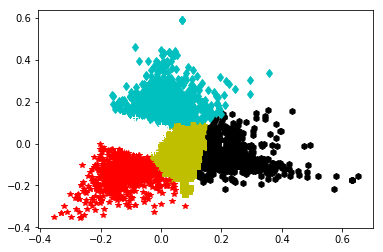

In [132]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
data=pca.fit_transform(ww)

kms=KMeans(n_clusters=5)
y=kms.fit_predict(data)

for i in range(0,len(y)):
    if(y[i]==0):      
        plt.plot(data[i,0],data[i,1],"*r")
    elif(y[i]==1):      
        plt.plot(data[i,0],data[i,1],"sy")
    elif(y[i]==2):       
        plt.plot(data[i,0],data[i,1],"hk")
    elif(y[i]==3):      
        plt.plot(data[i,0],data[i,1],"dc")
    elif(y[i]==4):       
        plt.plot(data[i,0],data[i,1],"+w")
    elif(y[i]==5):      
        plt.plot(data[i,0],data[i,1],"g")
    elif(y[i]==6):       
        plt.plot(data[i,0],data[i,1],"m")
plt.show()

### LDA

In [18]:
import pandas as pd
data=pd.read_csv("ans.csv")
d=data[0:1000]
d=d.dropna(axis=0)  
data=d['ans']

In [6]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]

transformer=TfidfVectorizer( max_features  =1000, decode_error = 'ignore', stop_words = stopwords_french )

tfidf = transformer.fit_transform(d)


In [9]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 30
lda = LatentDirichletAllocation(n_topics=n_topics, 
                                max_iter=50,
                                learning_method='batch')
lda.fit(tfidf)         


F:\AI\Anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=30, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic #%d:" % topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

    print( model.components_)

words=transformer.get_feature_names()
n_top_words=10
print_top_words(lda, words, n_top_words)


Topic #0:
stop stopper actionnaire flore faune envoyer tellement absolument multiplier terrer
Topic #1:
magasin éleveur auto mieux océan contribuable consigner contribution faire décennie
Topic #2:
chasser face alimentaire gaspillage biodiversité retrouver animal utilisation tv déchet
Topic #3:
mondiale futur davantage animal terme financièrement rapport climat attendre réchauffement
Topic #4:
gestion parer rendement in directement facturer arreter sein taxation croire
Topic #5:
information viser mettre urger nom priver vie rapidement plastiquer nettoyage
Topic #6:
lourd poids europe camion moteur espèce éviter lutter ferroutage planète
Topic #7:
proposer avenir continuer devon vite meilleur courser économique baser ressourcer
Topic #8:
solaire panneau bâtiment construction photovoltaïques élevage adapter technologie obligatoire vieux
Topic #9:
alimentation concréter commune efficace lancer locale réelle maire échelle partout
Topic #10:
merci fiscalité restauration transformer accompag

In [19]:
from gensim import corpora, models, similarities

from nltk.corpus import stopwords 
stop = stopwords.words('french')
stopwords_french = stop+["com", "Ap.", "Apr.", "GHz", "MHz", "USD", "a", "afin", "ah", "ai", "aie", "aient", "aies", "ait", "alors", "après", "as", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avons", "ayant", "ayez", "ayons", "b", "bah", "banco", "ben", "bien", "bé", "c", "c'", "c'est", "c'était", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "chaque", "chez", "ci", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "cm", "cm2", "comme", "contre", "d", "d'", "d'après", "d'un", "d'une", "dans", "de", "depuis", "derrière", "des", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "dg", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dl", "dm", "donc", "dont", "douze", "du", "dudit", "duquel", "durant", "dès", "déjà", "e", "eh", "elle", "elles", "en", "en-dehors", "encore", "enfin", "entre", "envers", "es", "est", "et", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "e?mes", "e?t", "e?tes", "f", "fait", "fi", "flac", "fors", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "f?mes", "f?t", "f?tes", "g", "gr", "h", "ha", "han", "hein", "hem", "heu", "hg", "hl", "hm", "hm3", "holà", "hop", "hormis", "hors", "huit", "hum", "hé", "i", "ici", "il", "ils", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kg", "km", "km2", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "lez", "lors", "lorsqu'", "lorsque", "lui", "lès", "m", "m'", "ma", "maint", "mainte", "maintes", "maints", "mais", "malgré", "me", "mes", "mg", "mgr", "mil", "mille", "milliards", "millions", "ml", "mm", "mm2", "moi", "moins", "mon", "moyennant", "mt", "m2", "m3", "même", "mêmes", "n", "n'avait", "n'y", "ne", "neuf", "ni", "non", "nonante", "nonobstant", "nos", "notre", "nous", "nul", "nulle", "no",
                    "néanmoins", "o", "octante", "oh", "on", "ont", "onze", "or", "ou", "outre", "où", "p", "par", "par-delà", "parbleu", "parce", "parmi", "pas", "passé", "pendant", "personne", "peu", "plus", "plus_d'un", "plus_d'une", "plusieurs", "pour", "pourquoi", "pourtant", "pourvu", "près", "puisqu'", "puisque", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quinze", "quoi", "quoiqu'", "quoique", "r", "revoici", "revoilà", "rien", "s", "s'", "sa", "sans", "sauf", "se", "seize", "selon", "sept", "septante", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "si", "sinon", "six", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "sus", "t", "t'", "ta", "tacatac", "tandis", "te", "tel", "telle", "telles", "tels", "tes", "toi", "ton", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trois", "très", "tu", "u", "un", "une", "unes", "uns", "v", "vers", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "voici", "voilà", "vos", "votre", "vous", "w", "x", "y", "z", "zéro", "à", "?'", "?a", "ès", "étaient", "étais", "était", "étant", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "?"]
texts = [[word for word in str(document).lower().split() if word not in stopwords_french] for document in data]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]
lda.show_topics(total_topics,5)

[(0,
  '0.014*"taxer" + 0.012*"transition" + 0.010*"devoir" + 0.007*"écologique" + 0.007*"énergie"'),
 (1,
  '0.013*"pouvoir" + 0.008*"falloir" + 0.008*"devoir" + 0.005*"faire" + 0.005*"taxer"'),
 (2,
  '0.009*"faire" + 0.009*"falloir" + 0.008*"france" + 0.007*"pouvoir" + 0.006*"nucléaire"'),
 (3,
  '0.013*"falloir" + 0.007*"pouvoir" + 0.007*"énergie" + 0.007*"devoir" + 0.007*"faire"'),
 (4,
  '0.013*"faire" + 0.010*"taxer" + 0.009*"pouvoir" + 0.008*"produire" + 0.007*"devoir"')]

In [21]:
lda.print_topics(num_topics=6,num_words =10)

[(0,
  '0.014*"taxer" + 0.012*"transition" + 0.010*"devoir" + 0.007*"écologique" + 0.007*"énergie" + 0.006*"falloir" + 0.006*"faire" + 0.005*"entreprendre" + 0.005*"arrêter" + 0.005*"produire"'),
 (1,
  '0.013*"pouvoir" + 0.008*"falloir" + 0.008*"devoir" + 0.005*"faire" + 0.005*"taxer" + 0.005*"produire" + 0.005*"voiturer" + 0.004*"aller" + 0.004*"entreprendre" + 0.004*"france"'),
 (2,
  '0.009*"faire" + 0.009*"falloir" + 0.008*"france" + 0.007*"pouvoir" + 0.006*"nucléaire" + 0.005*"énergie" + 0.005*"produire" + 0.005*"taxer" + 0.005*"transition" + 0.005*"écologique"'),
 (3,
  '0.013*"falloir" + 0.007*"pouvoir" + 0.007*"énergie" + 0.007*"devoir" + 0.007*"faire" + 0.006*"produire" + 0.006*"taxer" + 0.005*"développer" + 0.005*"placer" + 0.005*"mettre"'),
 (4,
  '0.013*"faire" + 0.010*"taxer" + 0.009*"pouvoir" + 0.008*"produire" + 0.007*"devoir" + 0.007*"véhiculer" + 0.006*"falloir" + 0.005*"mettre" + 0.005*"entreprendre" + 0.005*"écologique"')]

In [24]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
data_lda

{0: OrderedDict([('taxer', 0.014456143),
              ('transition', 0.011953543),
              ('devoir', 0.009656647),
              ('écologique', 0.0073161274),
              ('énergie', 0.0065783877),
              ('falloir', 0.0060710954),
              ('faire', 0.0058220155),
              ('entreprendre', 0.0054754526),
              ('arrêter', 0.00511659),
              ('produire', 0.005064314),
              ('polluer', 0.0041681305),
              ('pouvoir', 0.004065141),
              ('grand', 0.0037022913),
              ('français', 0.003669879),
              ('france', 0.0035282376),
              ('partir', 0.0031028606),
              ('permettre', 0.0029788697),
              ('consommation', 0.002944179),
              ('solution', 0.002833759),
              ('aider', 0.0027980404),
              ('politiquer', 0.0027920685),
              ('créer', 0.0027456281),
              ('véhiculer', 0.002741234),
              ('réduire', 0.002592847),
            

In [25]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(49, 5)
(5, 49)


In [26]:
df_lda

,aider,aller,an,arrêter,avoir,consommation,créer,devoir,développer,entreprendre,...,transport,transports,utiliser,ville,voir,voiturer,véhiculer,écologie,écologique,énergie
0,0.002798,0.000000,0.000000,0.005117,0.000000,0.002944,0.002746,0.009657,0.000000,0.005475,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.002741,0.00000,0.007316,0.006578
1,0.000000,0.004226,0.000000,0.000000,0.000000,0.000000,0.000000,0.007809,0.000000,0.004065,...,0.003436,0.000000,0.000000,0.003074,0.00000,0.004865,0.002884,0.00000,0.003561,0.003316
2,0.000000,0.003736,0.000000,0.000000,0.002987,0.003753,0.000000,0.004318,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.004148,0.000000,0.00317,0.004535,0.005361
3,0.004510,0.004115,0.003037,0.000000,0.002850,0.000000,0.000000,0.006891,0.005093,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00309,0.004092,0.000000,0.00000,0.003623,0.007175
4,0.003316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007345,0.000000,0.005030,...,0.000000,0.003692,0.003706,0.000000,0.00000,0.004602,0.007005,0.00000,0.004972,0.004358


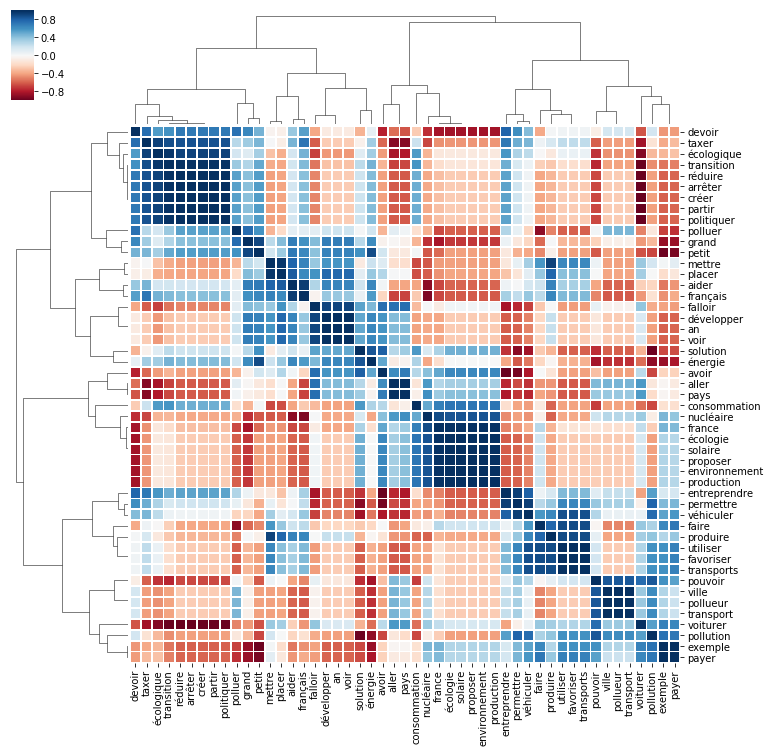

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [38]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      34.522274        1       1  117.901123 -278.509796
4      28.000254        1       2  203.007751  103.106461
3      15.981059        1       3  -77.969376  213.392899
0      11.279854        1       4 -129.790512 -100.509727
1      10.216563        1       5  397.595764 -127.678604, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
239   Default  7.000000          taxer  7.000000  30.0000  30.0000
437   Default  4.000000     transition  4.000000  29.0000  29.0000
137   Default  7.000000        pouvoir  7.000000  28.0000  28.0000
21    Default  6.000000         devoir  6.000000  27.0000  27.0000
107   Default  8.000000        falloir  8.000000  26.0000  26.0000
105   Default  3.000000   entreprendre  3.000000  25.0000  25.0000
246   Default  5.000000        énergie  5.000000  24.0000  24.0000
78    Default  4.000000     écologique  4.000000  23.0000  23.0000
629   Default  2.000000        arrêter  2.000000  22.0000  22.0000
257   Default  2.000000          aller  2.000000  21.0000  21.0000
703   Default  2.000000        polluer  2.000000  20.0000  20.0000
401   Default  1.000000          ville  1.000000  19.0000  19.0000
153   Default  3.000000      véhiculer  3.000000  18.0000  18.0000
181   Default  2.000000     développer  2.000000  17.0000  17.0000
36    Default  2.000000       français  2.000000  16.0000  16.0000
771   Default  2.000000      pollution  2.000000  15.0000  15.0000
227   Default  5.000000       produire  5.000000  14.0000  14.0000
216   Default  3.000000         mettre  3.000000  13.0000  13.0000
252   Default  2.000000          aider  2.000000  12.0000  12.0000
1081  Default  0.000000              ;  0.000000  11.0000  11.0000
748   Default  2.000000      transport  2.000000  10.0000  10.0000
309   Default  1.000000          impôt  1.000000   9.0000   9.0000
134   Default  2.000000         placer  2.000000   8.0000   8.0000
444   Default  1.000000    agriculture  1.000000   7.0000   7.0000
38    Default  3.000000          grand  3.000000   6.0000   6.0000
403   Default  3.000000       voiturer  3.000000   5.0000   5.0000
204   Default  1.000000      favoriser  1.000000   4.0000   4.0000
242   Default  2.000000     transports  2.000000   3.0000   3.0000
412   Default  1.000000        limiter  1.000000   2.0000   2.0000
383   Default  3.000000      permettre  3.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
771    Topic5  0.376900      pollution  2.502131   0.3882  -5.5542
257    Topic5  0.411497          aller  2.862504   0.3415  -5.4664
107    Topic5  0.817991        falloir  8.120234  -0.0141  -4.7794
485    Topic5  0.203532       importer  1.029404   0.6602  -6.1704
645    Topic5  0.207573            vie  1.074360   0.6372  -6.1507
403    Topic5  0.473720       voiturer  3.955420   0.1589  -5.3256
703    Topic5  0.373549        polluer  2.771834   0.2769  -5.5632
791    Topic5  0.290846       pollueur  1.910002   0.3991  -5.8134
33     Topic5  0.192318            fin  1.004128   0.6284  -6.2271
84     Topic5  0.207113          ainsi  1.161769   0.5567  -6.1529
105    Topic5  0.395752   entreprendre  3.445539   0.1171  -5.5054
283    Topic5  0.198075          achat  1.103325   0.5637  -6.1976
242    Topic5  0.276552     transports  2.075503   0.2656  -5.8638
58     Topic5  0.318790           pays  2.734105   0.1321  -5.7217
227    Topic5  0.477813       produire  5.820801  -0.2188  -5.3170
383    Topic5  0.338823      permettre  3.164043   0.0470  -5.6607
38     Topic5  0.334445          grand  3.206825   0.0206  -5.6737
239    Topic5  0.496801          taxer  7.301272  -0.4065  -5.2780
174    Topic5  0.511481          faire  8.655486  -0.5475  -5.2489
35     Topic5  0.393695         france  5.037514  -0.2679  -5.5106


In [42]:
import sklearn
sklearn.__version__


'0.19.1'